# Biến đổi file CSV thành npy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
columns_data = ["sub" + str(i) for i in range(1, 129)]

file_path = '/content/drive/MyDrive/nckh/SO.csv'  # Replace with the path to your CSV file

df = pd.read_csv(file_path)
df = df.to_numpy()
combined_data = np.vstack([columns_data, df])
with open('/content/drive/MyDrive/nckh/SO_real.csv', mode='w', newline='') as file:
              writer = csv.writer(file)
              writer.writerows(combined_data)



In [ ]:
import csv
import os
import numpy as np
import pandas as pd
import ast
columns_label = ["sub" + str(i) for i in range(1, 129)]
data_0 = []
def Extract_data_csv(input_file, column_to_data):
    with open(input_file, 'r') as file:
        reader = csv.reader(file)
        header = next(reader)
        file_number = 0
        for row in reader:
            data = row[column_to_data].replace(" ",",")
            new_data = np.array(ast.literal_eval(data))
            data_0.append(new_data)
    with open('/content/drive/MyDrive/nckh/SO2.csv', mode='w', newline='') as file:
             # a = np.abs(data_0)
              writer = csv.writer(file)
              writer.writerows(data_0)
Extract_data_csv('/content/drive/MyDrive/nckh/SO_1_raw.csv', 25)

In [ ]:
import csv
import os
import numpy as np
import ast
# label to check
Label_0 ="LA"
Label_1 ="RA"
Label_2 ="LL"
Label_3 ="RL"
Label_4 ="JJ"
Label_5 ="SO"
# data to save
data_0 = []  # LA
data_1 = []  # RA
data_2 = []  # LL
data_3 = []  # RL
data_4 = []  # JJ
data_5 = []  # SO
# add label
columns_label = ["sub" + str(i) for i in range(1, 129)]

#column_to_check_label input is index columns label ,  column_to_data is index columns data csi
def split_csv(input_file, output_prefix, lines_per_file, column_to_check_label,column_to_data):
    with open(input_file, 'r') as file:
        reader = csv.reader(file)
        header = next(reader)
        file_number = 0
        for row in reader:
            data = row[column_to_data].replace(" ",",")
            new_data = np.array(ast.literal_eval(data))
            if row[column_to_check_label] == "LA" :
             data_0.append(new_data)
            elif row[column_to_check_label] == "RA" :
             data_1.append(new_data)
            elif row[column_to_check_label] == "LL" :
             data_2.append(new_data)
            elif row[column_to_check_label] == "RL" :
             data_3.append(new_data)
            elif row[column_to_check_label] == "JJ" :
             data_4.append(new_data)
            elif row[column_to_check_label] == "SO" :
             data_5.append(new_data)
            else:
              continue

    with open('/content/drive/MyDrive/nckh/LA3.csv', mode='w', newline='') as file:
              a = np.abs(data_0)
              dat = []
              dat.insert(0,a)
              dat.insert(0,columns_label)
              writer = csv.writer(file)
              writer.writerows(dat)
              '''
    with open('/content/drive/MyDrive/nckh/RA.csv', mode='w', newline='') as file:
              writer = csv.writer(file)
              writer.writerows(data_1)
    with open('/content/drive/MyDrive/nckh/LL.csv', mode='w', newline='') as file:
              writer = csv.writer(file)
              writer.writerows(data_2)
    with open('/content/drive/MyDrive/nckh/RL.csv', mode='w', newline='') as file:
              writer = csv.writer(file)
              writer.writerows(data_3)
    with open('/content/drive/MyDrive/nckh/JJ.csv', mode='w', newline='') as file:
              writer = csv.writer(file)
              writer.writerows(data_4)
    with open('/content/drive/MyDrive/nckh/SO.csv', mode='w', newline='') as file:
              writer = csv.writer(file)
              writer.writerows(data_5)
'''
split_csv('/content/drive/MyDrive/nckh/Data_real.csv', '/content/drive/MyDrive/nckh/dataset/', 1000, 26,25)

In [ ]:
import pandas as pd
import numpy as np

# Đường dẫn đến file CSV chứa dữ liệu CSI
file_path = '/content/drive/MyDrive/nckh/LA.csv'

# Đọc dữ liệu từ file CSV vào DataFrame
df = pd.read_csv(file_path, header=None)

# Chuyển đổi DataFrame thành mảng NumPy
csi_data = df.to_numpy()

# Trích xuất biên độ
amplitude = np.abs(csi_data)

# In biên độ
print(amplitude)

[[125  48   8 ...   0   0   0]
 [121 112   8 ...   0   0   0]
 [ 17  16  14 ...   0   0   0]
 ...
 [110  96   6 ...   0   0   0]
 [110  96   6 ...   0   0   0]
 [110  96   6 ...   0   0   0]]


<ipython-input-89-8e8d230e10f4>:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x, y, z, c=color, marker='o')


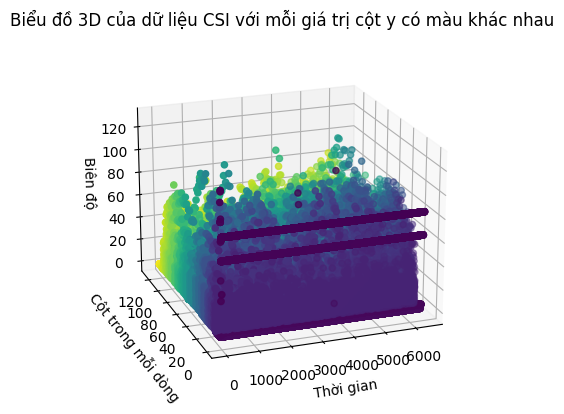

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Giả sử csi_data là một mảng chứa dữ liệu CSI
df = pd.read_csv('/content/drive/MyDrive/nckh/SO_real.csv')

csi_data = df.to_numpy()

# Tạo mảng thời gian tương ứng với số lượng điểm dữ liệu CSI
time = np.arange(len(csi_data))

# Tạo biểu đồ 3D với mỗi giá trị của cột y có màu khác nhau và hướng trục Z sang bên trái
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(csi_data.shape[1]):
    y = np.ones_like(time) * i
    x = time
    z = np.abs(csi_data[:, i])
    color = cm.viridis(i / csi_data.shape[1])  # Sử dụng colormap viridis

    # Vẽ mỗi điểm dữ liệu CSI bằng một điểm màu khác nhau
    ax.scatter(x, y, z, c=color, marker='o')

# Đặt tiêu đề và nhãn trục
ax.set_title('Biểu đồ 3D của dữ liệu CSI với mỗi giá trị cột y có màu khác nhau')
ax.set_ylabel('Cột trong mỗi dòng')
ax.set_xlabel('Thời gian')
ax.set_zlabel('Biên độ')

# Thay đổi hướng của trục Z sang bên trái
ax.view_init(elev=20, azim= 250)

# Hiển thị biểu đồ
plt.show()

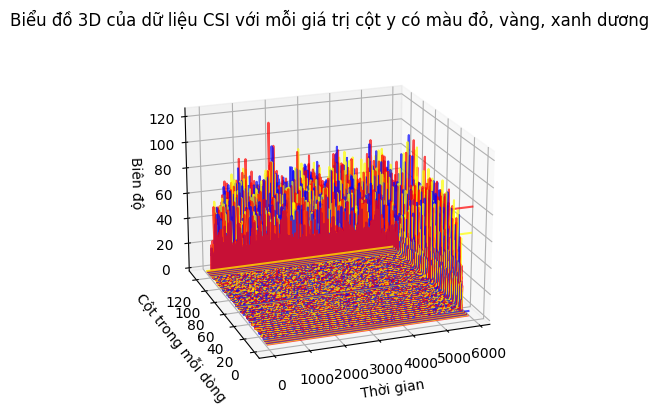

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Giả sử csi_data là một mảng chứa dữ liệu CSI
df = pd.read_csv('/content/drive/MyDrive/nckh/NA_real.csv')

csi_data = df.to_numpy()

# Tạo mảng thời gian tương ứng với số lượng điểm dữ liệu CSI
time = np.arange(len(csi_data))

# Tạo biểu đồ 3D với mỗi giá trị của cột y có màu khác nhau và hướng trục Z sang bên trái
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'yellow', 'blue'] * (csi_data.shape[1] // 3 + 1)  # Lặp màu đỏ, vàng, xanh dương

for i in range(csi_data.shape[1]):
    y = np.ones_like(time) * i
    x = time
    z = np.abs(csi_data[:, i])

    # Chọn màu cho cột hiện tại
    color = colors[i % len(colors)]

    # Vẽ hình sóng cho mỗi cột dữ liệu CSI
    ax.plot(x, y, z, color=color, alpha=0.7)

# Đặt tiêu đề và nhãn trục
ax.set_title('Biểu đồ 3D của dữ liệu CSI với mỗi giá trị cột y có màu đỏ, vàng, xanh dương')
ax.set_ylabel('Cột trong mỗi dòng')
ax.set_xlabel('Thời gian')
ax.set_zlabel('Biên độ')

# Thay đổi hướng của trục Z sang bên trái
ax.view_init(elev=20, azim=250)

# Hiển thị biểu đồ
plt.show()

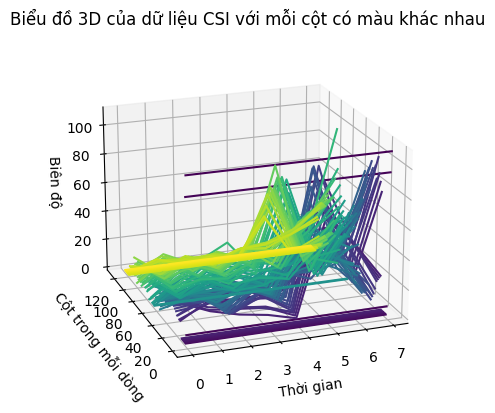

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Giả sử csi_data là một mảng chứa dữ liệu CSI
df = pd.read_csv('/content/drive/MyDrive/nckh/LA1_test.csv')

csi_data = df.to_numpy()

# Tạo mảng thời gian tương ứng với số lượng điểm dữ liệu CSI
time = np.arange(len(csi_data))

# Tạo biểu đồ 3D với mỗi cột có màu khác nhau và hướng trục Z sang bên trái
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(csi_data.shape[1]):
    y = np.ones_like(time) * i
    x = time
    z = np.abs(csi_data[:, i])
    color = cm.viridis(i / csi_data.shape[1])  # Sử dụng colormap viridis

    # Vẽ mỗi dòng dữ liệu CSI bằng một dòng màu khác nhau
    ax.plot(x, y, z, color=color)

# Đặt tiêu đề và nhãn trục
ax.set_title('Biểu đồ 3D của dữ liệu CSI với mỗi cột có màu khác nhau')
ax.set_ylabel('Cột trong mỗi dòng')
ax.set_xlabel('Thời gian')
ax.set_zlabel('Biên độ')

# Thay đổi hướng của trục Z sang bên trái
ax.view_init(elev=20, azim=250)

# Hiển thị biểu đồ
plt.show()


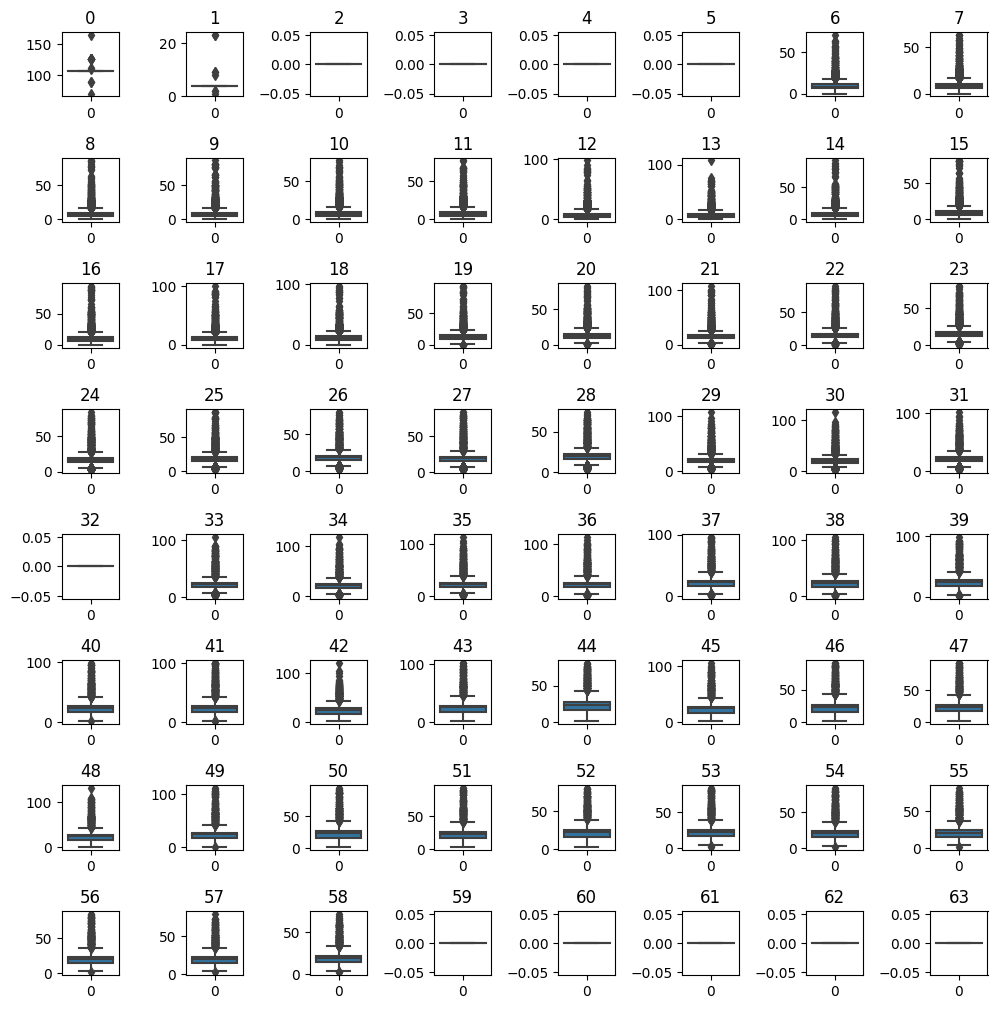

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
from sklearn.model_selection import cross_val_score

# Tạo đối tượng GridSpec
gs = GridSpec(16, 16)

# Vẽ biểu đồ boxplot
fig = plt.figure(figsize=(20, 20))

df = pd.read_csv('/content/drive/MyDrive/nckh/NA_hampel.csv')

# Lấy danh sách các tên cột
list_colnames = df.columns.tolist()

for i, col_name in enumerate(list_colnames):
    row = i // 8
    col = i % 8
    ax = fig.add_subplot(gs[row, col])
    sns.boxplot(data=df[col_name], ax=ax)
    ax.set_title(col_name)

# Tăng khoảng cách giữa các biểu đồ
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


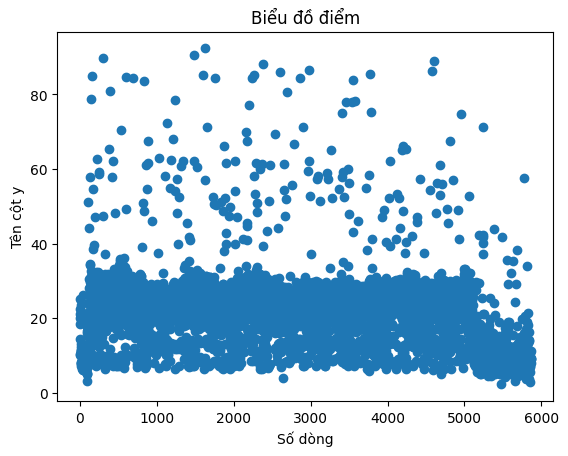

(5863, 64)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tệp CSV vào DataFrame
df = pd.read_csv('/content/drive/MyDrive/nckh/NA_hampel.csv')

# Trực quan hóa dữ liệu dưới dạng biểu đồ điểm
plt.scatter(df.index + 1, df['50'])
plt.xlabel('Số dòng')
plt.ylabel('Tên cột y')
plt.title('Biểu đồ điểm')
plt.show()
df.shape

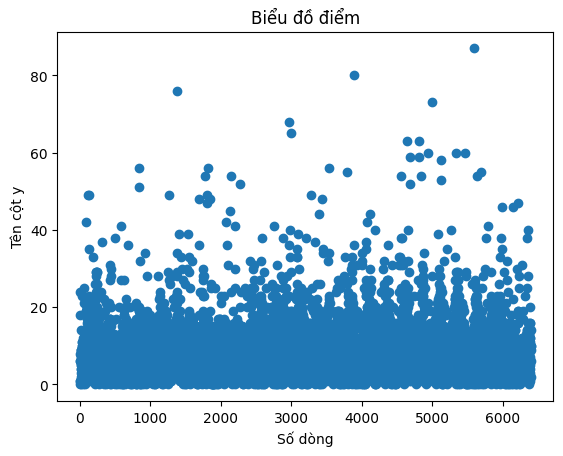

(6400, 128)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tệp CSV vào DataFrame
df = pd.read_csv('/content/drive/MyDrive/nckh/SO_real.csv')

# Trực quan hóa dữ liệu dưới dạng biểu đồ điểm
plt.scatter(df.index + 1, df['sub118'])
plt.xlabel('Số dòng')
plt.ylabel('Tên cột y')
plt.title('Biểu đồ điểm')
plt.show()
df.shape

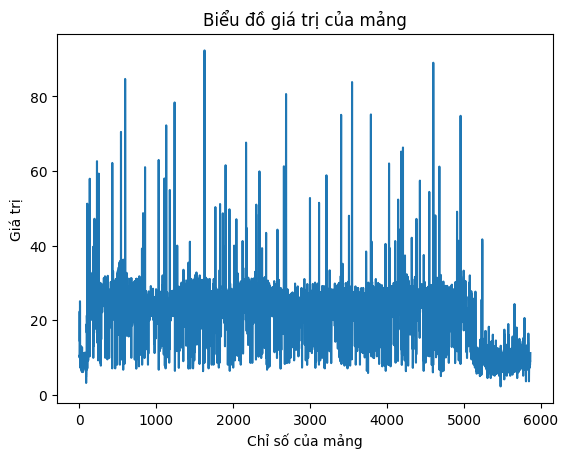

In [ ]:
import matplotlib.pyplot as plt

my_array = [10, 20, 15, 25, 30]

plt.plot(filtered_data)
plt.xlabel('Chỉ số của mảng')
plt.ylabel('Giá trị')
plt.title('Biểu đồ giá trị của mảng')
plt.show()

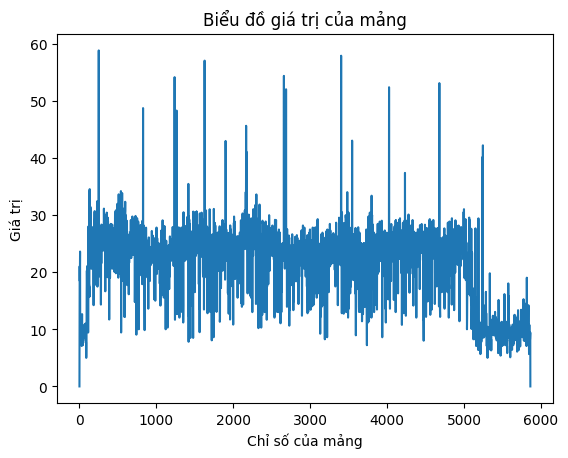

In [ ]:
import matplotlib.pyplot as plt

my_array = [10, 20, 15, 25, 30]

plt.plot(medians)
plt.xlabel('Chỉ số của mảng')
plt.ylabel('Giá trị')
plt.title('Biểu đồ giá trị của mảng')
plt.show()

TypeError: ignored

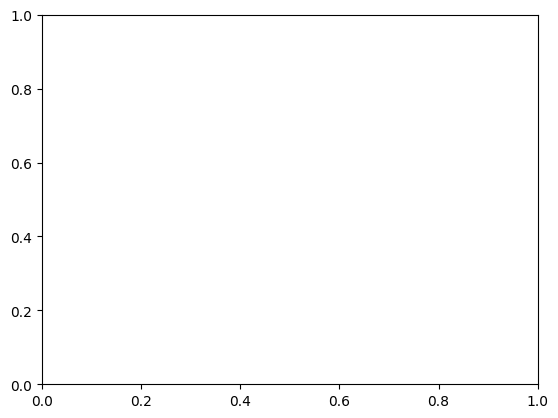

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tệp CSV vào DataFrame
df = pd.read_csv('/content/drive/MyDrive/nckh/NA_hampel.csv')

# Trực quan hóa dữ liệu
plt.plot(data12)
plt.xlabel('Số dòng')
plt.ylabel('Tên cột y')
plt.title('Biểu đồ')
plt.show()

In [ ]:
pip install hampel

In [ ]:
import pandas as pd
from hampel import hampel

# Đọc dữ liệu từ tệp CSV vào DataFrame
df = pd.read_csv('/content/drive/MyDrive/nckh/SO_real.csv')

# Chọn cột bạn muốn lọc
column_to_filter = 'sub118'

# Áp dụng bộ lọc Hampel vào cột đã chọn
window_size = 3  # Điều chỉnh kích thước cửa sổ nếu cần
threshold = 3.0  # Điều chỉnh ngưỡng nếu cần
df = hampel(df[column_to_filter], window_size=window_size)
df


Result(filtered_data=0        0.0
1       18.0
2        6.0
3       24.0
4        1.0
        ... 
6395     2.0
6396     9.0
6397     6.0
6398    10.0
6399    10.0
Length: 6400, dtype: float32, outlier_indices=array([   5,   13,   17,   23,   34,   35,   42,   45,   49,   52,   66,
         67,   74,   78,   94,   97,  112,  124,  134,  137,  141,  161,
        162,  166,  177,  183,  190,  193,  197,  203,  211,  231,  232,
        250,  265,  283,  287,  303,  316,  333,  335,  347,  351,  357,
        366,  387,  391,  400,  404,  411,  416,  422,  423,  430,  434,
        435,  461,  464,  465,  469,  483,  484,  485,  497,  500,  502,
        508,  524,  525,  531,  539,  540,  541,  544,  547,  549,  551,
        555,  583,  587,  591,  596,  605,  606,  607,  608,  609,  611,
        622,  642,  646,  672,  693,  694,  705,  707,  710,  712,  736,
        737,  738,  762,  764,  773,  775,  781,  786,  787,  788,  795,
        799,  810,  832,  833,  836,  844,  847,  849,  850,

In [ ]:
import csv
import os
import numpy as np
import ast
# label to check
Label_0 ="LA"
Label_1 ="RA"
Label_2 ="LL"
Label_3 ="RL"
Label_4 ="JJ"
Label_5 ="SO"
# data to save
data_0 = []  # LA
data_1 = []  # RA
data_2 = []  # LL
data_3 = []  # RL
data_4 = []  # JJ
data_5 = []  # SO


#column_to_check_label input is index columns label ,  column_to_data is index columns data csi
def split_csv(input_file, output_prefix, lines_per_file, column_to_check_label,column_to_data):
    with open(input_file, 'r') as file:
        reader = csv.reader(file)
        header = next(reader)
        file_number = 0
        for row in reader:
            data = row[column_to_data].replace(" ",",")
            new_data = np.array(ast.literal_eval(data))
            if row[column_to_check_label] == "LA" :
             data_0.append(new_data)
            elif row[column_to_check_label] == "RA" :
             data_1.append(new_data)
            elif row[column_to_check_label] == "LL" :
             data_2.append(new_data)
            elif row[column_to_check_label] == "RL" :
             data_3.append(new_data)
            elif row[column_to_check_label] == "JJ" :
             data_4.append(new_data)
            elif row[column_to_check_label] == "SO" :
             data_5.append(new_data)
            else:
              continue
        np.save(f'{output_prefix}LA.npy', np.array(data_0))
        #loaded_array = np.load(f'{output_prefix}LA_0.npy.npy')

        np.save(f'{output_prefix}RA.npy', np.array(data_1))
       # loaded_array = np.load(f'{output_prefix}RA_0.npy.npy')

        np.save(f'{output_prefix}LL.npy', np.array(data_2))
       # loaded_array = np.load(f'{output_prefix}LL_0.npy.npy')

        np.save(f'{output_prefix}RL.npy', np.array(data_3))
        #loaded_array = np.load(f'{output_prefix}RL_0.npy.npy')

        np.save(f'{output_prefix}JJ.npy', np.array(data_4))
        #loaded_array = np.load(f'{output_prefix}JJ_0.npy.npy')

        np.save(f'{output_prefix}SO.npy', np.array(data_5))
       # loaded_array = np.load(f'{output_prefix}SO_0.npy.npy')
# Print the loaded array


split_csv('/content/drive/MyDrive/nckh/Data_real.csv', '/content/drive/MyDrive/nckh/dataset/', 1000, 26,25)

In [ ]:
import numpy as np
import os

arr = ["LA","RA","LL","RL","JJ","SO"]

for i in arr:
# Đọc mảng từ tệp .npy
 input_file = f'/content/drive/MyDrive/nckh/dataset/{i}.npy'
 output_file = '/content/drive/MyDrive/nckh/dataset/'
 arr = np.load(input_file)

 num_rows_per_subarray = 50
 num_subarrays = len(arr) // num_rows_per_subarray

 subarrays = []

# Trích xuất tên tệp đầu vào (loại bỏ phần mở rộng .npy)
 input_filename_without_extension = os.path.splitext(input_file)[0]

 for i in range(num_subarrays):
    start_idx = i * num_rows_per_subarray
    end_idx = (i + 1) * num_rows_per_subarray
    subarray = arr[start_idx:end_idx]
    # Đặt tên cho tệp con bằng tên tệp đầu vào kèm theo số thứ tự
    filename = f"{input_filename_without_extension}_{i}.npy"
    np.save(filename, subarray)

 os.remove(input_file)

In [ ]:
import numpy as np

# Đường dẫn đến tệp .npy cần đọc
file_path = '/content/drive/MyDrive/nckh/C_397.npy'

# Sử dụng np.load() để đọc tệp .npy
loaded_data = np.load(file_path)

In [ ]:
#loaded_data
loaded_data.shape

(500, 52)

In [ ]:
data_real = []

In [ ]:
import re
from math import sqrt, atan2

if __name__ == "__main__":
    """
    This script file demonstrates how to transform raw CSI out from the ESP32 into CSI-amplitude and CSI-phase.
    """

    FILE_NAME = '/content/drive/MyDrive/nckh/tvat-SO-3.csv'

    f = open(FILE_NAME)

    for j, l in enumerate(f.readlines()):
        imaginary = []
        real = []
        amplitudes = []
        phases = []

        # Parse string to create integer list
        csi_string = re.findall(r"\[(.*)\]", l)[0]
        csi_raw = [int(x) for x in csi_string.split(" ") if x != '']

        # Create list of imaginary and real numbers from CSI
        for i in range(len(csi_raw)):
            if i % 2 == 0:
                imaginary.append(csi_raw[i])
            else:
                real.append(csi_raw[i])

        # Transform imaginary and real into amplitude and phase
        for i in range(int(len(csi_raw) / 2)):
            amplitudes.append(sqrt(imaginary[i] ** 2 + real[i] ** 2))
            phases.append(atan2(imaginary[i], real[i]))
        data_real.append(amplitudes)


In [ ]:
data_real

In [ ]:
df = pd.DataFrame(data_real)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,69.856997,1.0,0.0,0.0,0.0,0.0,13.038405,10.770330,8.246211,15.132746,...,32.449961,34.828150,38.013156,38.013156,40.000000,0.0,0.0,0.0,0.0,0.0
1,164.878743,8.0,0.0,0.0,0.0,0.0,15.556349,16.401219,17.691806,22.022716,...,30.413813,30.265492,32.249031,31.144823,36.221541,0.0,0.0,0.0,0.0,0.0
2,125.876924,23.0,0.0,0.0,0.0,0.0,18.357560,17.464249,18.973666,23.769729,...,29.274562,30.364453,35.171011,33.955854,34.205263,0.0,0.0,0.0,0.0,0.0
3,125.876924,23.0,0.0,0.0,0.0,0.0,3.000000,9.433981,7.071068,9.486833,...,14.317821,11.180340,14.317821,15.652476,15.652476,0.0,0.0,0.0,0.0,0.0
4,126.253713,4.0,0.0,0.0,0.0,0.0,9.848858,14.317821,12.165525,12.041595,...,13.341664,13.152946,17.464249,14.142136,15.033296,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6717,105.603030,4.0,0.0,0.0,0.0,0.0,19.313208,16.155494,18.601075,22.360680,...,11.180340,13.601471,14.866069,15.524175,15.811388,0.0,0.0,0.0,0.0,0.0
6718,105.603030,4.0,0.0,0.0,0.0,0.0,13.453624,13.601471,11.401754,13.892444,...,9.848858,8.062258,9.000000,10.049876,15.000000,0.0,0.0,0.0,0.0,0.0
6719,105.603030,4.0,0.0,0.0,0.0,0.0,16.278821,23.021729,20.615528,27.000000,...,14.866069,14.866069,16.401219,16.643317,18.357560,0.0,0.0,0.0,0.0,0.0
6720,105.603030,4.0,0.0,0.0,0.0,0.0,18.027756,24.351591,13.000000,21.023796,...,7.000000,8.062258,10.049876,9.219544,10.440307,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.to_csv('/content/drive/MyDrive/nckh/SO3_hampel.csv', index=False)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/nckh/SO3_hampel.csv')
data = data.to_numpy().T

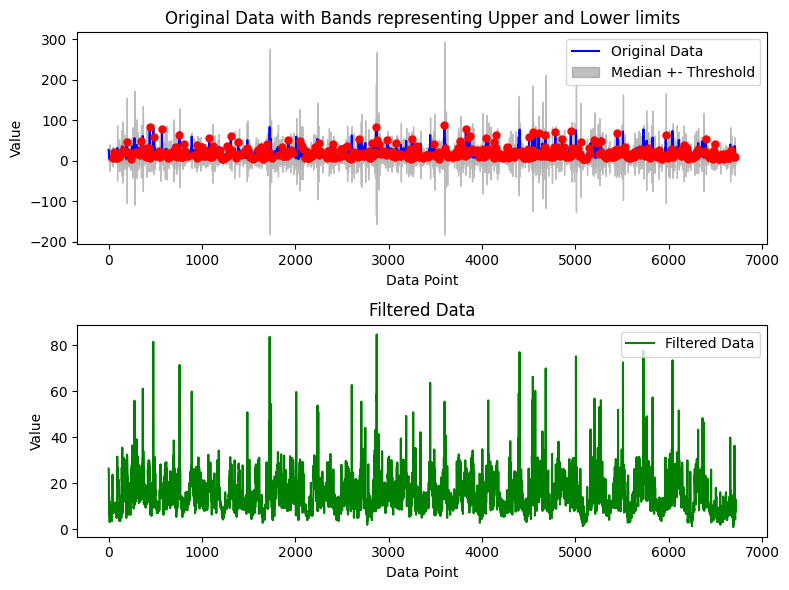

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from hampel import hampel


original_data = data[50]
# Add outliers to the original data

result = hampel(data[50], window_size=3, n_sigma=5.0)

filtered_data = result.filtered_data
outlier_indices = result.outlier_indices
medians = result.medians
thresholds = result.thresholds

fig, axes = plt.subplots(2, 1, figsize=(8, 6))

# Plot the original data with estimated standard deviations in the first subplot
axes[0].plot(original_data, label='Original Data', color='b')
axes[0].fill_between(range(len(original_data)), medians + thresholds, medians - thresholds, color='gray', alpha=0.5, label='Median +- Threshold')
axes[0].set_xlabel('Data Point')
axes[0].set_ylabel('Value')
axes[0].set_title('Original Data with Bands representing Upper and Lower limits')

for i in outlier_indices:
    axes[0].plot(i, original_data[i], 'ro', markersize=5)  # Mark as red

axes[0].legend()

# Plot the filtered data in the second subplot
axes[1].plot(filtered_data, label='Filtered Data', color='g')
axes[1].set_xlabel('Data Point')
axes[1].set_ylabel('Value')
axes[1].set_title('Filtered Data')
axes[1].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from scipy import signal

def lowpass(csi_vec: np.array, cutoff: float, fs: float, order: int) -> np.array:
    nyq = 0.5*fs
    normal_cutoff = cutoff/nyq
    b, a = signal.butter(order, normal_cutoff, btype="low", analog=False)
    return signal.filtfilt(b, a, csi_vec)

def bandpass(csi_vec: np.array, low_cut: float, high_cut: float, fs: float, order: int) -> np.array:
    nyq = 0.5*fs
    b, a = signal.butter(order, [low_cut/nyq, high_cut/nyq], btype="band", analog=False)
    return signal.filtfilt(b, a, csi_vec)

# Original implementation from whyrlpool.
# Runs slightly slower than Pandas implementation.
def hampel(csi: np.array, k: int=3, nsigma: int=3) -> np.array:
    index = 0
    csi = csi.copy()
    for x in csi:
        y = 0
        if index <= k:
            #Special case, first few samples.
            y = k
        elif index+k > len(csi):
            #Special case, last few samples
            y = -k

        index += y
        stdev = np.std(csi[index-k:index+k])
        median = np.median(csi[index-k:index+k])
        index -= y

        if abs(x-median) > nsigma * stdev:
            csi[index] = median
        index += 1

    return csi
data12 = hampel(data[50],3,3)

In [ ]:
for i in outlier_indices:
    axes[0].plot(i, original_data[i], 'ro', markersize=5)  # Mark as red

axes[0].legend()
# Plot the filtered data in the second subplot
axes[1].plot(data12, label='Filtered Data', color='g')
axes[1].set_xlabel('Data Point')
axes[1].set_ylabel('Value')
axes[1].set_title('Filtered Data')
axes[1].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd

# Đọc dữ liệu từ tệp CSV vào DataFrame
data = pd.read_csv('/content/drive/MyDrive/nckh/NA_hampel.csv')

# Chuyển đổi DataFrame thành mảng NumPy
numpy_array = data.values  # hoặc data.to_numpy()

print(numpy_array)

[[ 69.85699679   1.           0.         ...   0.           0.
    0.        ]
 [110.02272493   9.           0.         ...   0.           0.
    0.        ]
 [164.87874332   8.           0.         ...   0.           0.
    0.        ]
 ...
 [105.60303026   4.           0.         ...   0.           0.
    0.        ]
 [105.60303026   4.           0.         ...   0.           0.
    0.        ]
 [105.60303026   4.           0.         ...   0.           0.
    0.        ]]
